In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

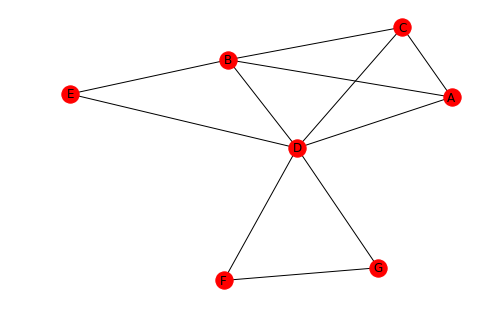

In [90]:
G = nx.Graph()
for i in ['A','B','C','D','E','F', 'G']:
    G.add_node(i)

G.add_edge('A','B',weight = 3)
G.add_edge('A','C',weight = 5)
G.add_edge('A','D',weight = 20)
G.add_edge('B','C',weight = 1)
G.add_edge('B','D',weight = 14)
G.add_edge('B','E',weight = 13)
G.add_edge('C','D',weight = 11)
G.add_edge('D','E',weight = 9)
G.add_edge('D','F',weight = 7)
G.add_edge('D','G',weight = 11)
G.add_edge('F','G',weight = 12)

nx.draw(G, with_labels=True)
plt.show()

In [34]:
G.get_edge_data('A', 'B')['weight']

3

In [82]:
a = [5, 7]
print(a)

a.pop(0)
print(a)

[5, 7]
[7]


In [94]:
list(G.neighbors('A'))

['C', 'B', 'D']

In [81]:
help(list.pop)

Help on method_descriptor:

pop(...)
    L.pop([index]) -> item -- remove and return item at index (default last).
    Raises IndexError if list is empty or index is out of range.



In [51]:
dicts = {'A': 10, 
         'B': 20, 
         'C': 5}

lst = [1, 10, 5]
print(lst.index(10))

sorted(dicts.values()), sorted(dicts.keys())

1


([5, 10, 20], ['A', 'B', 'C'])

In [49]:
help(dict)

Help on class dict in module __builtin__:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> x==y
 |  
 |  __ge__(...)
 |      x.__ge__(y) <==> x>=y
 |  
 |  __getattribute__(...)
 |      x.__getattribute__('name') <==> x.name
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(...)
 |      x.__gt__(y) <==> x

In [91]:
def dijkstra(s, G):
    nodes = list(G.nodes())
    n = len(nodes)
    dist = []
    for i in nodes:
        dist.append(np.inf)
    
    x = nodes.index(s)
    dist[x] = 0
    
    visited = []
    cloud = [s]   
    
    for i in cloud:
        print ("cloud", cloud)
        idx = nodes.index(i)
        neig = list(G.neighbors(i))
        
        print (i, ":", dist[idx])
        
        new_dist = []
        neig_new = []
        print (neig)
        for j in neig:
            idx_new = nodes.index(j)
            d = int(G.get_edge_data(i,j)['weight'])
            if d + dist[idx] < dist[idx_new]:
                dist[idx_new] = d + dist[idx]
            if j not in visited:
                new_dist.append(dist[idx_new])
                neig_new.append(j)
        
        print (neig_new)
        
        while neig_new:
            min_idx = new_dist.index(min(new_dist))
            cloud.append(neig_new[min_idx])
            neig_new.remove(neig_new[min_idx])
            new_dist.remove(new_dist[min_idx])
        
        visited.append(cloud.pop(0))
    
    return dist, nodes
    
dijkstra('A', G)

('cloud', ['A'])
('A', ':', 0)
['C', 'B', 'D']
['C', 'B', 'D']
('cloud', ['B', 'C', 'D'])
('C', ':', 15)
['A', 'B', 'D']
['B', 'D']
('cloud', ['C', 'D', 'B', 'D'])
('B', ':', 13)
['A', 'C', 'E', 'D']
['C', 'E', 'D']
('cloud', ['D', 'B', 'D', 'C', 'D', 'E'])
('C', ':', 15)
['A', 'B', 'D']
['D']
('cloud', ['B', 'D', 'C', 'D', 'E', 'D'])
('E', ':', 36)
['B', 'D']
[]


([0, 15, 13, 36, 30, inf, inf], ['A', 'C', 'B', 'E', 'D', 'G', 'F'])